In [1]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from kalman_filter import KalmanFilter
import pickle as pk

/var/folders/07/231x2gks4j5fvh_h32tcwgfm0000gn/T/ipykernel_4133/4059535785.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
x0 = np.array([[0], 
                [0]])  # initial state
P = np.eye(2) * 1000    # initial uncertainty
A = np.array([[1.,1.],
            [0.,1.]])   # state transition matrix
H = np.array([[1., 0.]])   # Measurement matrix
Q = np.eye(2) * 0.01    # process noise covariance
R = np.array([[5.]])  # measurement noise covariance

kf = KalmanFilter(x0, P, A, H, Q, R)

In [4]:
df = pk.load(open('/Users/yefan/Desktop/rot2/rot2-project/data/2024-02-13_first_mouse_test_SC23_analysis/trial2.pkl', 'rb'))
zs = df['mouse_pos_x'].values
print(zs)

[162. 162. 163. ... 127. 127. 127.]


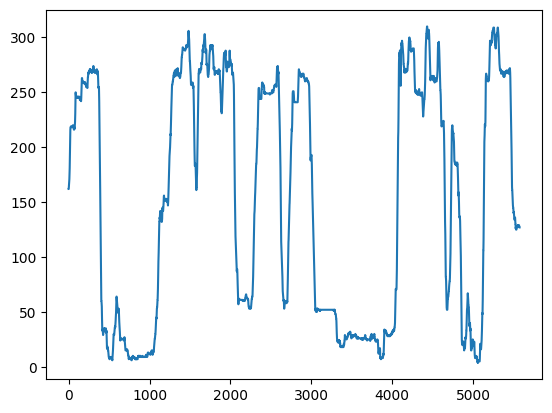

In [26]:
plt.plot(zs, label='measured')

In [27]:
kfx = np.zeros(len(zs))
kfv = np.zeros(len(zs))
for i, z in enumerate(zs):
    kf.predict()
    kf.update(z)
    kfx[i] = kf.x[0, 0]
    kfv[i] = kf.x[1, 0]

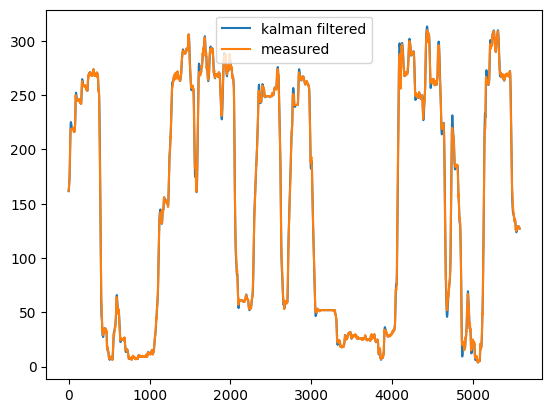

In [28]:
plt.plot(kfx, label='kalman filtered')
plt.plot(zs, label='measured')
plt.legend()

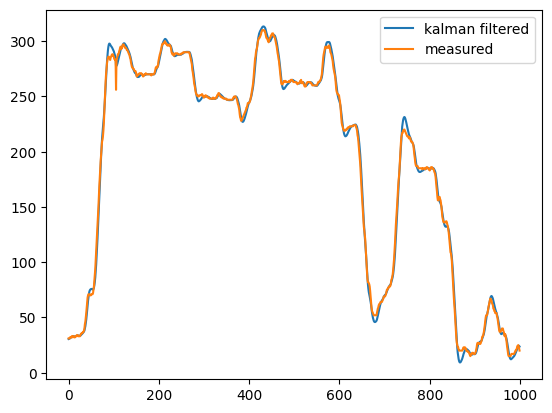

In [29]:
loc, pad = 4500, 500

plt.plot(kfx[loc - pad: loc + pad], label='kalman filtered')
plt.plot(zs[loc - pad: loc + pad], label='measured')
plt.legend()

In [52]:
class KalmanFilter:
    def __init__(self, x0, P, A, H, Q, R):
        self.x = x0 # state
        self.P = P  # uncertainty covariance
        self.A = A  # state transition matrix
        self.H = H  # Measurement matrix
        self.Q = Q  # process noise covariance
        self.R = R  # measurement noise covariance

    def predict(self):
        self.x = self.A @ self.x    # a priori state estimate
        self.P = self.A @ self.P @ self.A.T + self.Q    # a priori estimate covariance
        print(f'x: {self.x}')
        print(f'P: {self.P}')

    def update(self, z):
        assert z.shape == self.x.shape
        y = z - self.H @ self.x   # residual
        print(f'y: {y}')
        S = self.H @ self.P @ self.H.T + self.R  # residual covariance
        print(f'S: {S}')
        K = self.P @ self.H.T @ np.linalg.inv(S)    # Kalman gain
        print(f'K: {K}')

        self.x = self.x + np.dot(K, y)  # a posteriori state estimate
        self.P = (np.eye(len(self.x)) - K @ self.H) @ self.P    # a posteriori estimate covariance

In [57]:
chip_kf = KalmanFilter(
    np.array([[0], [0]]), # x and y position
    np.eye(2) * 1000, 
    np.array([[1., 0.], 
              [0., 1.]]), 
    np.array([[1., 0.],
              [0., 1.]]), 
    np.eye(2) * 0.1, 
    np.eye(2) * 5.
    )

In [58]:
zx = np.linspace(0, 100, 100)
zy = np.zeros(100)

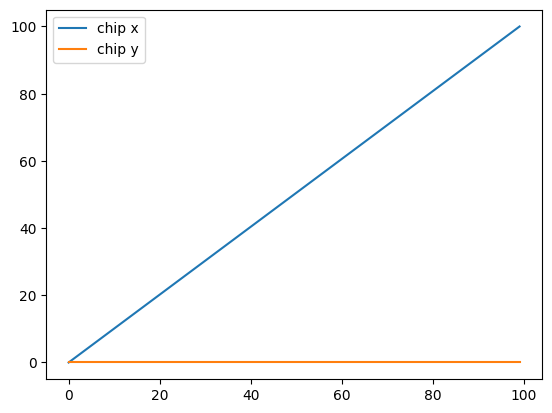

In [59]:
plt.plot(zx, label='chip x')
plt.plot(zy, label='chip y')
plt.legend()

In [60]:
kfx = np.zeros(len(zx))
kfy = np.zeros(len(zy))
for i in range(len(zx)):
    chip_kf.predict()
    chip_kf.update(np.array([[zx[i]], [zy[i]]]))
    kfx[i] = chip_kf.x[0, 0]
    kfy[i] = chip_kf.x[1, 0]

x: [[0.]
 [0.]]
P: [[1000.1    0. ]
 [   0.  1000.1]]
y: [[0.]
 [0.]]
S: [[1005.1    0. ]
 [   0.  1005.1]]
K: [[0.99502537 0.        ]
 [0.         0.99502537]]
x: [[0.]
 [0.]]
P: [[5.07512685 0.        ]
 [0.         5.07512685]]
y: [[1.01010101]
 [0.        ]]
S: [[10.07512685  0.        ]
 [ 0.         10.07512685]]
K: [[0.50372833 0.        ]
 [0.         0.50372833]]
x: [[0.5088165]
 [0.       ]]
P: [[2.61864166 0.        ]
 [0.         2.61864166]]
y: [[1.51138552]
 [0.        ]]
S: [[7.61864166 0.        ]
 [0.         7.61864166]]
K: [[0.34371503 0.        ]
 [0.         0.34371503]]
x: [[1.02830242]
 [0.        ]]
P: [[1.81857516 0.        ]
 [0.         1.81857516]]
y: [[2.00200061]
 [0.        ]]
S: [[6.81857516 0.        ]
 [0.         6.81857516]]
K: [[0.26670897 0.        ]
 [0.         0.26670897]]
x: [[1.56225394]
 [0.        ]]
P: [[1.43354485 0.        ]
 [0.         1.43354485]]
y: [[2.4781501]
 [0.       ]]
S: [[6.43354485 0.        ]
 [0.         6.43354485]]
K: [

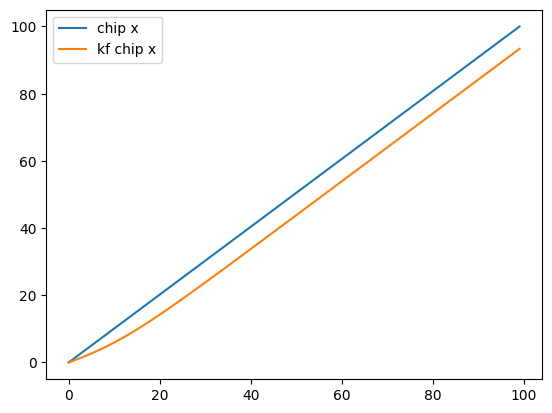

In [61]:
plt.plot(zx, label='chip x')
plt.plot(kfx, label='kf chip x')
plt.legend()

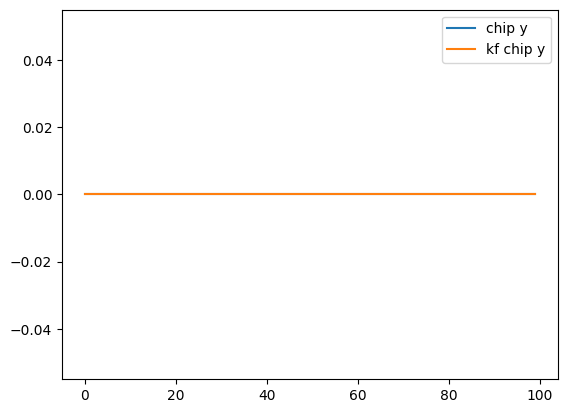

In [62]:
plt.plot(zy, label='chip y')
plt.plot(kfy, label='kf chip y')
plt.legend()

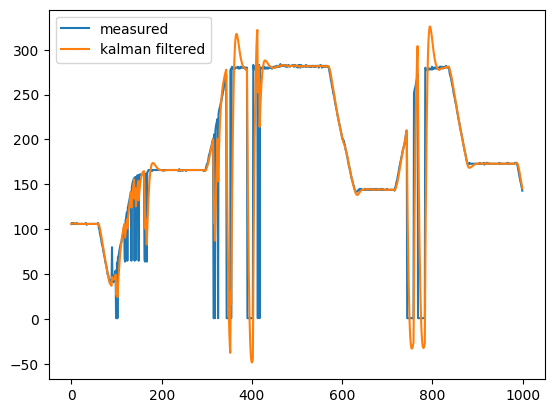

In [27]:
loc, pad = 2500, 500

plt.plot(zx[loc - pad: loc + pad], label='measured')
plt.plot(kfx[loc - pad: loc + pad], label='kalman filtered')
plt.legend()